<a href="https://colab.research.google.com/github/rsztjnxz/CS634-HW3/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pwd

'/content/drive/MyDrive/faster-rcnn.pytorch'

In [17]:
cd ..

/content/drive/MyDrive


In [2]:
import torchvision
import torch
import torchvision.transforms
import os

In [3]:
# step1. importing the picture from the file: train_2017
res = list()
for filename in os.listdir(r"/content/drive/MyDrive/coco_minitrain_25k/images/train2017"): 
   res.append(filename)  
print(len(res))

3436


In [4]:
print(res)

['000000070602.jpg', '000000456799.jpg', '000000144683.jpg', '000000129888.jpg', '000000051079.jpg', '000000340612.jpg', '000000510864.jpg', '000000354425.jpg', '000000318825.jpg', '000000031375.jpg', '000000101781.jpg', '000000288560.jpg', '000000333653.jpg', '000000312117.jpg', '000000207500.jpg', '000000098927.jpg', '000000178647.jpg', '000000312894.jpg', '000000288450.jpg', '000000225829.jpg', '000000378604.jpg', '000000063421.jpg', '000000498547.jpg', '000000394208.jpg', '000000384587.jpg', '000000361071.jpg', '000000171221.jpg', '000000150834.jpg', '000000343215.jpg', '000000221701.jpg', '000000294565.jpg', '000000441841.jpg', '000000045053.jpg', '000000555461.jpg', '000000088582.jpg', '000000486496.jpg', '000000001360.jpg', '000000234916.jpg', '000000374651.jpg', '000000411505.jpg', '000000061206.jpg', '000000280043.jpg', '000000566456.jpg', '000000387492.jpg', '000000512467.jpg', '000000466766.jpg', '000000570801.jpg', '000000085624.jpg', '000000179405.jpg', '000000455181.jpg',

In [5]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

def read_2017(nums):
  output_res = list()
  for i in nums:
    person_int = read_image(str(Path('/content/drive/MyDrive/coco_minitrain_25k/images/train2017')/i))
    output_res.append(person_int)
    #grid = make_grid(output_res)
  return output_res



In [12]:
lists = read_2017(res[:5])
lists

[tensor([[[49, 48, 48,  ..., 54, 57, 59],
          [51, 50, 49,  ..., 61, 63, 63],
          [52, 50, 49,  ..., 70, 66, 64],
          ...,
          [14, 14, 16,  ..., 24, 23, 43],
          [14, 15, 15,  ..., 31, 36, 12],
          [14, 14, 14,  ...,  0, 10,  3]],
 
         [[49, 48, 48,  ..., 54, 57, 59],
          [51, 50, 49,  ..., 61, 63, 63],
          [52, 50, 49,  ..., 70, 66, 64],
          ...,
          [14, 14, 16,  ..., 24, 23, 43],
          [14, 15, 15,  ..., 31, 36, 12],
          [14, 14, 14,  ...,  0, 10,  3]],
 
         [[49, 48, 48,  ..., 54, 57, 59],
          [51, 50, 49,  ..., 61, 63, 63],
          [52, 50, 49,  ..., 70, 66, 64],
          ...,
          [14, 14, 16,  ..., 24, 23, 43],
          [14, 15, 15,  ..., 31, 36, 12],
          [14, 14, 14,  ...,  0, 10,  3]]], dtype=torch.uint8),
 tensor([[[180, 179, 187,  ..., 194, 188, 189],
          [185, 178, 183,  ..., 199, 193, 193],
          [183, 180, 178,  ..., 202, 199, 192],
          ...,
          [2

In [ ]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights


weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(d) for d in lists]

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model(images)
print(outputs)

In [8]:
from torchvision.utils import draw_bounding_boxes

In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

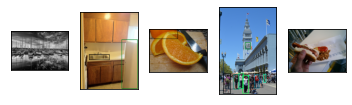

In [11]:
score_threshold = .98
dogs_with_boxes = [
    draw_bounding_boxes(dog_int, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for dog_int, output in zip(lists, outputs)
]
show(dogs_with_boxes)